In [1]:
# Uses LSTM RNN (Recurrent Neural Network) 
# Open, High, Low, Close, Adj Close (adjusted closing price), Volume
# Linear Regression 

In [2]:
# Github test

In [3]:
import sys
sys.path.append('utils')  

import stock_utils
import yfinance as yp

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import plot 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [5]:
ticker = 'GOOGL'
start_date = '2010-06-29'
end_date = '2019-03-15'
stock_data = yp.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-06-29  11.597598  11.625375  11.289289  11.367868  11.367868  139943916
2010-06-30  11.385385  11.457207  11.129129  11.134885  11.134885  143983872
2010-07-01  11.143393  11.221221  10.851602  10.998248  10.998248  140403456
2010-07-02  11.051552  11.068068  10.910911  10.924675  10.924675   77362560
2010-07-06  11.111111  11.202953  10.851602  10.912663  10.912663  102301596


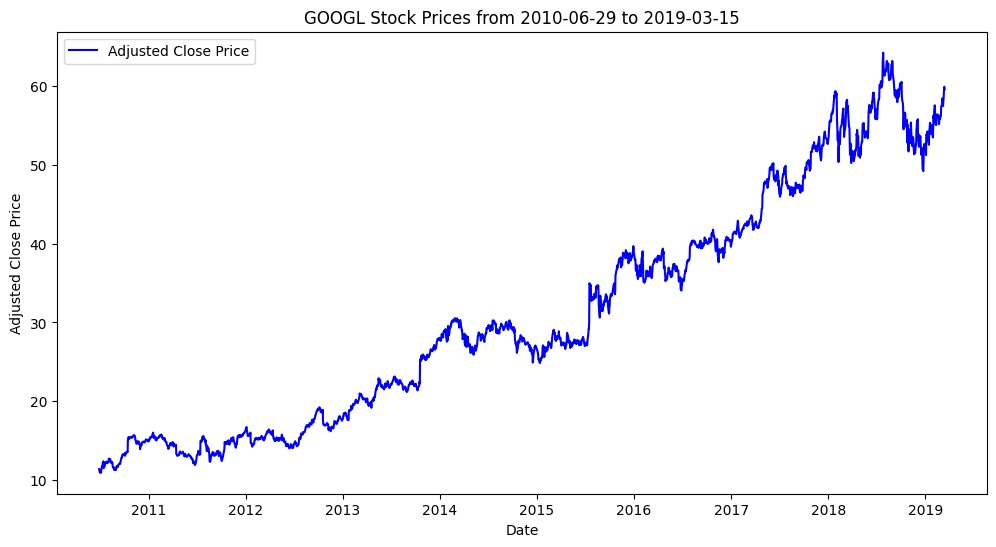

In [6]:
# Display the first few rows of the DataFrame
print(stock_data.head())

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title(f'{ticker} Stock Prices from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

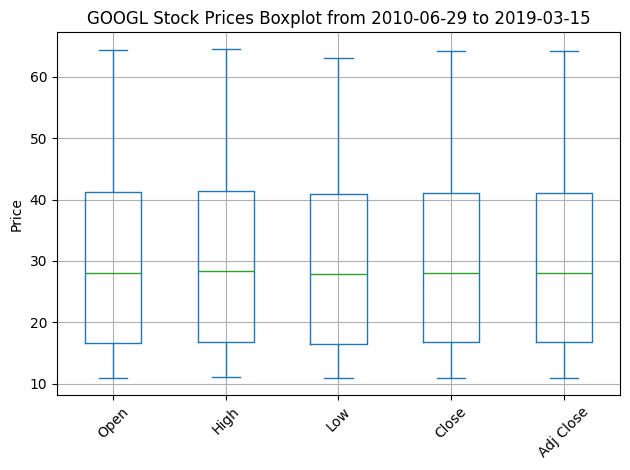

In [7]:
# Extract required columns for boxplot
boxplot_data = stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# Create traces for each boxplot
data = []
for column in boxplot_data.columns:
    trace = go.Box(y=boxplot_data[column], name=column, boxmean=True)
    data.append(trace)

# Create layout for the plot
layout = go.Layout(
    title=f'{ticker} Stock Prices Boxplot from {start_date} to {end_date}',
    yaxis=dict(title='Price'),
    boxmode='group'  # Group box plots together
)

# Create figure and plot
plt.figure(figsize=(10, 6))
boxplot_data.plot(kind='box')
plt.title(f'{ticker} Stock Prices Boxplot from {start_date} to {end_date}')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
stock_data.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2.192000e+03
mean,31.105695,31.366276,30.821476,31.101153,31.101153,6.712202e+07
std,14.635436,14.772619,14.490927,14.636954,14.636954,5.121910e+07
min,10.968719,11.068068,10.851602,10.912663,10.912663,1.041200e+07
25%,16.668856,16.813626,16.530656,16.720470,16.720470,3.259150e+07
50%,28.057501,28.308750,27.840000,28.067000,28.067000,5.070400e+07
75%,41.218751,41.442374,40.928500,41.126625,41.126625,8.743847e+07
max,64.456001,64.571999,63.150002,64.275002,64.275002,5.923990e+08


In [9]:
# Machine Learning 

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score

In [10]:
X = np.array(stock_data.index).reshape(-1, 1)
Y = stock_data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [11]:
# Feature scaling 
scaler = StandardScaler().fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression() 
lm.fit(X_train, Y_train) 

LinearRegression()

In [14]:
import numpy as np

# Convert datetime to float for prediction, assuming X_train.T[0] is datetime
X_train_float = X_train.T[0].astype('float64')

# Predict using the model (example code, adjust as per your actual model)
predicted_values = lm.predict(X_train_float.reshape(-1, 1))  # Reshape if necessary

# Plot actual and predicted values from training dataset 
trace0 = go.Scatter(
    x=X_train_float,
    y=Y_train, 
    mode='markers',  # Use 'markers' instead of 'Markers', all lowercase
    name='Actual'
)

trace1 = go.Scatter(
    x=X_train_float, 
    y=predicted_values,  # Use the predicted values from your model
    mode='lines',  # Use 'lines' instead of 'lines', all lowercase
    name='Predicted' 
)

# Assuming layout is defined somewhere in your code
layout.xaxis.title.text = 'Day' 

# Create the plot data list
stock_data = [trace0, trace1]

# Create the figure with data and layout
plot2 = go.Figure(data=stock_data, layout=layout)

# Display the plot (assuming you are using plotly offline)
plot(plot2)

'temp-plot.html'

In [15]:
# Build LSTM Model

In [16]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [17]:
ticker = 'GOOGL'
start_date = '2012-01-03'
end_date = '2019-03-15'
stock_data2 = yp.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [18]:
stock_data2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.339840,16.720470,16.325577,16.651901,16.651901,146912940
2012-01-04,16.642391,16.773024,16.532032,16.723724,16.723724,114445440
2012-01-05,16.569820,16.615866,16.422173,16.491741,16.491741,131184684
2012-01-06,16.495245,16.516518,16.261011,16.266768,16.266768,107608284
2012-01-09,16.178679,16.191191,15.546296,15.577077,15.577077,232671096


In [19]:
stock_data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1810 entries, 2012-01-03 to 2019-03-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1810 non-null   float64
 1   High       1810 non-null   float64
 2   Low        1810 non-null   float64
 3   Close      1810 non-null   float64
 4   Adj Close  1810 non-null   float64
 5   Volume     1810 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.0 KB


In [20]:
stock_data2['Close'] = pd.to_numeric(stock_data2.Close, errors = 'coerce') 
data = stock_data2.dropna()
trainData = stock_data2.iloc[:,4:5].values

In [21]:
stock_data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1810 entries, 2012-01-03 to 2019-03-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1810 non-null   float64
 1   High       1810 non-null   float64
 2   Low        1810 non-null   float64
 3   Close      1810 non-null   float64
 4   Adj Close  1810 non-null   float64
 5   Volume     1810 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.0 KB


In [22]:
sc = MinMaxScaler(feature_range = (0, 1)) 
trainData = sc.fit_transform(trainData)
trainData.shape

(1810, 1)

In [23]:
X_train = []
y_train = [] # 3D tensor input

for i in range(60, 1810): 
    X_train.append(trainData[i - 60:i, 0])
    y_train.append(trainData[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) 

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 
X_train.shape

(1750, 60, 1)

In [25]:
model = Sequential() 

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [26]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose = 2)

Epoch 1/20
55/55 - 7s - 127ms/step - loss: 0.0173
Epoch 2/20
55/55 - 3s - 64ms/step - loss: 0.0033
Epoch 3/20
55/55 - 4s - 66ms/step - loss: 0.0024
Epoch 4/20
55/55 - 4s - 64ms/step - loss: 0.0024
Epoch 5/20
55/55 - 3s - 64ms/step - loss: 0.0024
Epoch 6/20
55/55 - 4s - 64ms/step - loss: 0.0024
Epoch 7/20
55/55 - 4s - 71ms/step - loss: 0.0026
Epoch 8/20
55/55 - 4s - 65ms/step - loss: 0.0022
Epoch 9/20
55/55 - 4s - 64ms/step - loss: 0.0020
Epoch 10/20
55/55 - 3s - 60ms/step - loss: 0.0021
Epoch 11/20
55/55 - 3s - 62ms/step - loss: 0.0019
Epoch 12/20
55/55 - 3s - 60ms/step - loss: 0.0020
Epoch 13/20
55/55 - 3s - 59ms/step - loss: 0.0018
Epoch 14/20
55/55 - 3s - 61ms/step - loss: 0.0018
Epoch 15/20
55/55 - 3s - 60ms/step - loss: 0.0017
Epoch 16/20
55/55 - 3s - 61ms/step - loss: 0.0016
Epoch 17/20
55/55 - 3s - 60ms/step - loss: 0.0018
Epoch 18/20
55/55 - 3s - 60ms/step - loss: 0.0021
Epoch 19/20
55/55 - 3s - 62ms/step - loss: 0.0016
Epoch 20/20
55/55 - 3s - 63ms/step - loss: 0.0015


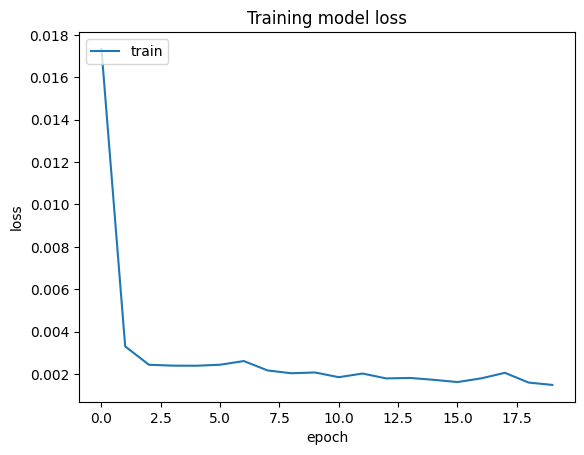

In [27]:
plt.plot(hist.history['loss'])
plt.title('Training model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left') 
plt.show() 

In [29]:
stockTestDataset = yp.download('GOOGL', start='2019-03-16', end='2024-06-18') 
stockTestDataset["Close"] = pd.to_numeric(stockTestDataset.Close, errors='coerce')
stockTestDataset = stockTestDataset.dropna()
stockTestDataset = stockTestDataset.iloc[:, 4:5]
Y_test = stockTestDataset.iloc[60:, 0].values

# input array for the model
inputClosing = stockTestDataset.iloc[:, 0].values
inputClosing_scaled = sc.transform(inputClosing.reshape(-1, 1))
inputClosing_scaled.shape

X_test = []
length = len(stockTestDataset)
timestep = 60

for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

[*********************100%%**********************]  1 of 1 completed


(1263, 60, 1)

In [30]:
y_pred = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


In [31]:
y_pred

array([[0.81983745],
       [0.813496  ],
       [0.8085713 ],
       ...,
       [1.9637555 ],
       [1.9643203 ],
       [1.9649124 ]], dtype=float32)

In [32]:
predicted_stock_price = sc.inverse_transform(y_pred)

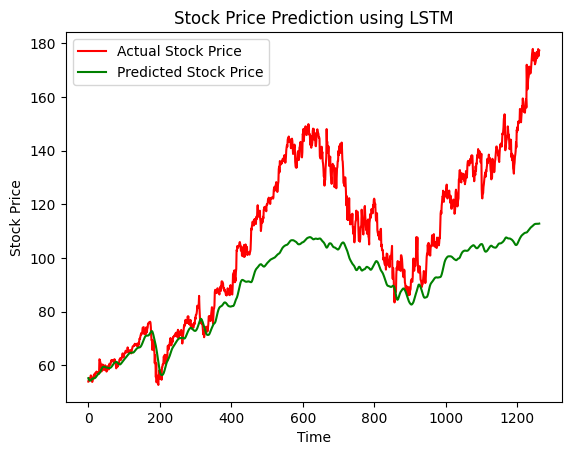

In [33]:
plt.plot(Y_test, color = 'red', label = 'Actual Stock Price') 
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price') 
plt.title('Stock Price Prediction using LSTM') 
plt.xlabel('Time') 
plt.ylabel('Stock Price') 
plt.legend()
plt.show() 